# 4주차 스터디

Made by 35기 코딩부장 류제현

수업 진행: 35기 이찬희

# 목차

**머신러닝을 위한 데이터 전처리**

1. null 값 다루기
2. Feature과 Label 나누기
3. Train / Test set 분리
4. 고차항특성 추가하기 - PolynomicalFeatures
5. 스케일링 - MinMax, Normalization
6. 범주형 데이터 다루기 - Ordinal, Dummy 변수

**Overfitting & Underfitting**

### 머신러닝을 위한 데이터 전처리

파이썬에서 데이터 전처리의 과정은 다음과 같음

1. 데이터 정제: 
결측치, 이상치, 중복값 제거 or 대체. dropna, fillna, drop_duplicates 등 함수 사용

2. 데이터 변환: 
분석하기 쉬운 형식으로 변환. ex) 문자열 -> 숫자 / 범주 -> 이진형. map, apply, get_dummies 등의 함수 사용

3. 스케일링: 
스케일 조정으로 0~1 사이 조정, 혹은 평준화로 평균이 0, 표준편차가 1이 되도록 스케일링 진행. MinMaxScaler, StandardScaler, Normalization 등 홤수 사용

4. 데이터 인코딩: 
변환된 데이터를 사용가능하게 인코딩. Label Encoding, One-Hot Encoding 등이 있음.

5. 데이터 분할:
전처리 데이터를 학습, 테스트 데이터로 나누어 학습과 평가를 진행. train_test_split 사용

6. 기타:
추가변환 및 인코딩 ex) 날짜면 datetime 등 사용 

In [1]:
#라이브러리 Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1. 데이터 전처리

    1-1) Null값 다루기 (Missing Values)

결측치(Null)를 다루는 다양한 방법이 있습니다 (Domain 지식이 필요)

1. 유사한 값을 찾아서 넣기 (평균, 중위수 등)

2. 단순히 결측치가 존재하는 데이터를 전부 Drop 해주기

In [ ]:
# 새로운 데이터셋 불러오기 (타이타닉 데이터셋)
# Seaborn은 Matplotlib을 기반으로 하는 시각화 패키지(라이브러리)임
from seaborn import load_dataset
titanic = load_dataset("titanic")

# 단순화를 위해 데이터셋의 일부만 사용하겠습니다
# sibsp: 동승한 자매, 배우자 수 // parch: 동승한 부모, 자식의 수
titanic = titanic[["survived","age","sibsp","parch","class"]]
titanic.head(8)

In [ ]:
# 컬럼별로 결측치가 얼마나 있는지 알아봅시다 
# 결측값이 있을 시 isna() isnull() => True / notna() notnull() => False 반환 
# sum을 하는 이유는 True = 1 / False = 0 로 계산되기 때문에

titanic.isna().sum()

In [ ]:
# null 값 찾기 방법 2 (총 891 entries 중 age 만 714 non null 891 - 714 = 177)
# 처음 Raw 데이터를 분석할 때 info부터 접근하면서 총 데이터량과 null 값을 대략적으로 판단 가능.
titanic.info()

In [ ]:
# null 값 찾기 3 - 자주 안쓰임. 참고

titanic.isna().value_counts()

In [ ]:
# age의 데이터는 177개의 Missing-Values가 존재합니다.
# 177개의 데이터는 drop하기에는 너무 많습니다. 
# 나이의 Null값에 평균 나이를 집어 넣는 간단한 방법으로 전처리 해 보겠습니다

# 평균 나이 구하기
mean_age = titanic.age.mean()

# fillna를 사용해서 missing-values에 mean_age채워주기
titanic.age = titanic.age.fillna(mean_age)
titanic.head(6) # 컬럼5에 나이의 평균값이 들어간걸 확인할 수 있다

In [ ]:
# 평균뿐 아니라 중앙값, 최빈값 찾기도 자주 쓰임. 
# 평균 mean, 중앙값 median, 최빈값 mode

# median_age = titanic.age.median()
# titanic.age = titanic.age.fillna(median_age)
# titanic.head(6)

# mode_age = titanic.age.mode()
# titanic.age = titanic.age.fillna(mode_age)
# titanic.head(6)

    1-2) 피쳐(Feature)와 라벨(Label) 분리

    나누는 이유:
    Feature과 Label을 분리하면 각각을 독립적으로 처리할 수 있음.
    ex) Feature 정규화를 통해 유사한 범위나 스케일을 만들어주면서 Label 즉 결과값,출력값에 영향을 미치지 않으면서 Feature만을 전처리할 수 있음.

    나중에 test train set 분리할 때도 feature과 label을 먼저 분리하면 test train 각각의 set가 일관되게 유지되고 train set이 test set에 영향을 끼치는 것을 방지할 수 있음.

In [12]:
# 사용할 데이터셋 불러오기
card = pd.read_csv("Data/credit_card_approval.csv",index_col=0)
card

,TARGET,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,JOB
0,0,Y,N,270000.0,-13258,-2300,Managers
1,0,N,N,81000.0,-17876,-377,Private service staff
2,0,Y,Y,270000.0,-19579,-1028,Laborers
3,0,Y,Y,112500.0,-15109,-1956,Core staff
4,0,Y,Y,139500.0,-17281,-5578,Drivers
...,...,...,...,...,...,...,...
49995,0,N,N,112500.0,-20285,-1734,High skill tech staff
49996,0,Y,Y,495000.0,-16497,-1190,Managers
49997,0,Y,Y,270000.0,-15054,-1527,High skill tech staff
49998,0,N,Y,103500.0,-15785,-1308,Medicine staff


In [ ]:
# Feature는 X, Label은 y로 분리해 주겠습니다
# Label은 예측하고자 하는 대상 항목(출력변수)를 말하며, Feature은 입력되는 정보(입력변수)를 의미함
# Feature과 Label을 나누는 이유는 각각을 독립적으로 처리해 이후 Test, Train set 설정시 Train set 데이터의 유출로 Testset에 영향이 가는 일을 방지할 수 있음.
# 해당 데이터에서 Target이 1이면 이상거래, 0이면 정상거래를 뜻함.
# loc은 변수명 기준 iloc은 인덱스 번호 기준(위치)

X = card.iloc[:,1:]     #첫번째 열을 제외한 모든 열 선택
y = card.TARGET         #첫번째 열만을 지정 (정답 데이터)

print(X.shape, y.shape) 

#참고로 y.shape은 1차원 배열이기 때문에 5000만이 출력되고 뒤에 값이 생략됨

In [ ]:
card['TARGET'].value_counts()

    1-3) Train-Test Split

ML을 위해서는 데이터를 Train_set(훈련세트)과 Test_set(테스트세트)로 분리해 줘야 한다

scikit-learn의 train_test_split 함수를 사용하면 된다

-> 왜 분리 할까? : Train-set으로 모델을 만든 이후, Test-set로 성능 측정을 한다

-> 훈련을 시킬 때 사용한 데이터로 모형의 성능까지 평가하면 해당 데이터셋에 과적합(Overfitting)될 수 있다

In [ ]:
# train_test_split 함수를 불러온다
from sklearn.model_selection import train_test_split

# Shuffle이 필요하지만, train_test_split은 shuffle을 해줌 - Default: (shuffle = True) 
# 시계열일 경우는 달라진다(순서를 보존해야함, shuffle = False)

X_train, X_test, y_train, y_test = train_test_split(X,y)  

# test_size 로 train 데이터와 test data의 비율을 조절 할 수 있으며 test의 비율을 20~30%로 잡는게 적당
# test_size의 default 값은 0.25 (비율이 너무 적으면 과적합의 문제가 발생)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25 , shuffle = True)

# X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1) -> random_state 값이 정해진 랜덤

# 잘 분리 된 것을 확인 할 수 있다
X_train.shape, X_test.shape, y_train.shape, y_test.shape

    1-4) 고차항 특성 추가하기



scikit-learn의 PolynomialFeature를 사용해 고차항 특성을 추가해보겠습니다


In [ ]:
# 고차항 특성을 추가하는 이유
# 일반적으로 모든 데이터가 선형으로 회귀하기 어려움
# 따라서 다차항으로 변환을 통해 더욱 데이터에 fit한 모델을 만들어내기 위해 polynomialFeature을 사용함

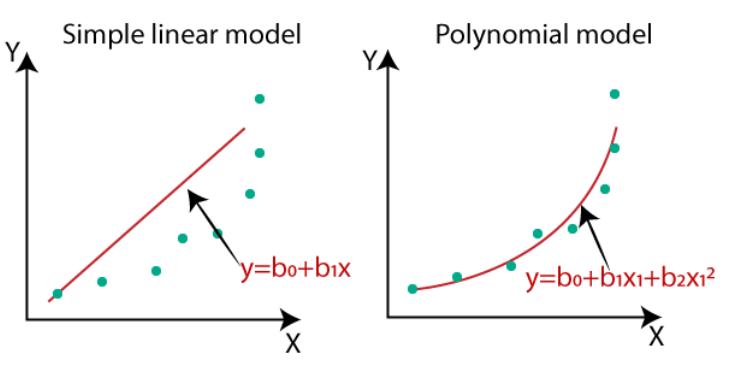

In [ ]:
# 예시를 위해 임의의 데이터를 생성하겠습니다
# reshape(-1,1)을 해주는 이유는? -> 각각을 하나의 데이터로 인식하도록 하기 위해서 / 안하면 리스트 하나로 인식
# reshape(-1,n) n열의 크기에 맞춰 형태를 지정 / 반대의 경우 (n,-1) n 행에 맞춰 배열 
X_sample = np.arange(1,5).reshape(-1,1)
X_sample

In [ ]:
# 싸이킷런의 PolynomialFeatures 함수를 사용합니다
## 이것도 똑같이 모델을 만들고, fit해주면 됩니다. 추가로 데이터셋의 변환도 시켜줘야하기 때문에, transform도 추가됩니다
from sklearn.preprocessing import PolynomialFeatures

# degree로 몇 차식까지 추가할 지 선택할 수 있습니다
poly_features = PolynomialFeatures(degree=3, include_bias=False) # include_bias=True일 경우 0차항인 1이 추가됩니다 (default = True)

# X_sample 데이터를 poly_features 객체에 맞게 변환하기 위해 fit 시킨뒤 transform으로 변환 시킴
poly_features.fit(X_sample)
X_poly = poly_features.transform(X_sample)
X_poly

In [ ]:
# fit과 transform을 한번에 수행할 수도 있습니다
X_poly2 = poly_features.fit_transform(X_sample)
X_poly2

    1-5) 스케일 조절하기

* Normalization(정규화), MinMaxScaling(0과 1사이로 변경) 등이 다양한 Scaler가 있습니다 

* 몇몇 머신러닝 알고리즘을 제외하고는 대부분의 머신러닝 알고리즘이 피처(Feature)의 스케일에 민감합니다. 

* 데이터범위가 너무 넓으면 계산속도가 느려지기에 스케일 조절로 범위를 줄이면 속도와 정확성이 올라감. 이상치의 영향을 줄여주기도 함.

* 예시) 삼성바이오로직스 주가(약 80만원) vs 엠피대산 주가(약 300원)

* ex) 주가와 거래량 Feature의 가중치 조절 

* 따라서, 특별히 가중치를 주는 경우가 아니라면 스케일을 동일하게 맞춰줄 필요가 있습니다

* fit을 해주면 필요한 통계량을 계산한다. 이후 transfrom 해준다. (!! Test_set에는 fit 하지 않도록 주의해야 한다 !! -> Data Leakage 누출 방지)

$X_{minmax} = {X - X_{min} \over X_{max} - X_{min}}$

# MinMaxScaling

In [ ]:
X_train #bool

In [ ]:
# 우선 변환을 위해, 데이터의 수치 특성만 가져옵니다
print(X_train.columns)

X_train_numeric = X_train[['AMT_INCOME_TOTAL', 'DAYS_BIRTH','DAYS_EMPLOYED']]
X_test_numeric = X_test[['AMT_INCOME_TOTAL', 'DAYS_BIRTH','DAYS_EMPLOYED']]

In [ ]:
# 확인해봅시다
X_train_numeric.head()

In [ ]:
# 최소는 0, 최대는 1로 변환한다
from sklearn.preprocessing import MinMaxScaler

# train-set을 우선 fit_transform해준다
minmax = MinMaxScaler()
X_train_minmax = minmax.fit_transform(X_train_numeric) 

# test-set은 fit해주지 않고, transform만 해준다 
# 모델 학습은 시키지 않고 train 데이터와 동일한 변환형식만을 적용해서 데이터 형태를 유지한다는 것.
X_test_minmax = minmax.transform(X_test_numeric)

In [ ]:
# 확인해봅시다
X_train_minmax

In [ ]:
# 과연 최댓값은 1로, 최솟값은 0으로 변환이 되었을 지 확인해보자 

# argmax는 최대값이 위치한 인덱스를 반환합니다(argmin은 반대)
idx_max = np.argmax(X_train_minmax[:,0]) # 인덱싱이 어려우면 데이터프레임으로 생각하면 수월하다
idx_min = np.argmin(X_train_minmax[:,0])

# 최댓값은 1, 최솟값은 0으로 잘 변환이 된 것을 확인할 수 있습니다
print("최대: ", X_train_minmax[idx_max])
print("최소: ", X_train_minmax[idx_min])

# Normalization

In [ ]:
# 많이 익숙한 "정규화" -> 데이터의 평균이 0, 분산은 1을 따르도록 변경한다
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
X_std = std.fit_transform(X_train_numeric)
X_std

# test-set변환시키는건 생략하겠습니다

# 정규화 문제

sklearn을 사용하지 않고 직접 정규화를 수행해보자.

힌트: 정규화 -> 평균을 빼주고 표준편차로 나눈다.

평균: mean()

분산: var()

표준편차: std()

In [ ]:
mean = X_train_numeric.mean(axis=0)   # 데이터에 따라 axis가 달라져야 할 수도 있음!
std = X_train_numeric.std(axis=0)

# 정규화 해주자 -> 결과가 똑같이 나왔다!!!
(X_train_numeric - mean) / std 

#    1-6) 범주형 특성(Categorical Data 다루기)

* 데이터의 순서가 의미가 있는 특성이 있고, 의미가 없는 특성이 있다

* 의미가 있는 특성은 순서가 있는 변수(Ordinal Variable)로, 없는 특성은 더미변수(Dummy Variable)로 변환해준다

* 수치형자료 VS 범주형자료

1. 수치형: 양적 데이터, 양적 자료
2. 범주형: 질적 데이터, 질적 자료

* ex) 범주형 데이터의 예시
1. 성별: 남자, 여자

2. 혈액형: A, B, O, AB

3. 대학: 성균관대, 서울대, 한국과학기술원 ...

* 범주형 데이터로 바꾸는 이유 -> 모델을 돌릴 때 범주형 데이터들로 돌리기엔 변수간의 상관관계를 파악하지 못해 발생하는 오류나 한계가 있기 때문에 이를 수치적 데이터로 바꿔줄 필요가 있음. 이를 위해 가짜 변수인 더비 변수로 만들어 주는 것임.

* 범주형 데이터를 처리하기 위해 Dummy, OneHotEncoding, OrdnialEncoding에 대해 배울 것임.

In [ ]:
card

In [ ]:
# 범주형 데이터(Categorical Data)만 분리하겠습니다

card_cat = card[["FLAG_OWN_CAR","FLAG_OWN_REALTY", "JOB"]]
card_cat.head()

# 1. 더미변수란? 
- 범주형 데이터를 연속형 변수처럼 만드는 것.

2. 만드는 이유
- 연속형 변수처럼 만들어서 연속형 변수를 요구하는 회기분석 등에 사용하려고.

3. 더미변수 특징
- 0 또는 1의 값을 가짐. 더미변수에 속하면 즉 True이면 1 False일시 0 

- 더미변수는 원래 범주형 변수의 범주 개수보다 1개 적게 만들어짐. 

- ex) 변수가 성별(남/여)라면 남성여부 혹은 여성여부 둘 중 하나만 만들어짐. (범주개수 2개 / 더미변수 1개)

- ex) 변수가 나라(한국,일본,중국)이라면 한국여부, 일본여부 혹은 일본여부 중국여부 혹은 한국여부 중국여부로 만들어짐. (범주 3개, 더미 2개)

In [ ]:
df = pd.DataFrame({'이름': ['김돌쇠', '율전이', '성성균', '명륜이'],
                   '성별': ['여자', '남자', '남자', '여자'],
                   '국적': ['한국', '일본', '중국', '한국']})
df

In [ ]:
pd.get_dummies(df, columns = ['성별', '국적'])

# 사실 여기서 앞서 언급했듯 성별_남자만 있어도 0과 1로 성별 구분이 가능함.

# 독립 변수의 일부가 다른 독립 변수의 조합으로 표현될 수 있는 경우,
# 다른말로 독립변수간 상관관계를 보이는 것을 다중공선성이라고 부름.

# 다중공선성이 있으면 변수들간의 의존성으로 인해 부정확한 회귀 결과가 도출될 수 있어서 해결할 필요가 있음.
# 다중공선성은 정규화, 의존적변수 삭제, PCA(주성부분석)등의 방식으로 해결 가능

In [ ]:
#drop_first 방식

pd.get_dummies(df, columns = ['성별', '국적'],
               drop_first=True)

더미변수 만들기

In [ ]:
# 첫번째 방법: dummy를 가져온 후 drop_first 사용
## 설명을 위해 FLAG_OWN_CAR만 가져오겠습니다.
# 기본형 -> pd.get_dummies(DataFrame, columns = [칼럼1,칼럼2,...])
# columns 없이 [['칼럼명', '칼럼명']] 가능 
# columns 자체를 지정 안하면 그냥 문자열 데이터들로 이루어진 열이 자동 지정됨.

pd.get_dummies(card_cat[["FLAG_OWN_CAR"]])

In [ ]:
# 통계학 / 계량경제학에서 사용하는 더미변수 (다중공선성(Multicollinearity) 방지)
pd.get_dummies(card_cat[["FLAG_OWN_CAR"]], 
               drop_first=True)

In [ ]:
# 두번째 방법: 데이터프레임 전체를 주면 판다스가 알아서 Categorical Data를 인식해서 더미를 만든다
pd.get_dummies(card)

In [ ]:
pd.get_dummies(card,drop_first = True)

OneHotEncoder 사용하기

In [ ]:
#세번째 방법: One hot encoder사용 -> 패키지를 설치해야함. 
!pip install --upgrade category_encoders

In [ ]:
from category_encoders import OneHotEncoder

card_OH = OneHotEncoder() #use_cat_names = True 괄호안에 이를 넣어야 원래 job 이름들이 뜸.아니면 데이터가 숫자로 뜸
df = card_OH.fit_transform(card)

df

OrdinalEncoder 사용하기

In [ ]:
# 이번엔 순서를가진(Ordinal) 데이터로 변경해보겠습니다
# 범주가 너무 많아 dummy나 onehotencoding을 사용하기 어려울 때 주로 사용.
# OrdinalEncoding은 범주의 특성을 변경하지 않고 그 안에서 1,2,3 등의 숫자로 변경하는 방법임. 
# 알아서 그냥 숫자를 배분해줌
from sklearn.preprocessing import OrdinalEncoder

ordinal = OrdinalEncoder()
ordinal.fit_transform(card[["JOB"]])

In [ ]:
# 각 숫자가 무엇을 의미하는지 확인할 수 있습니다
ordinal.categories_

### 2. Overfitting & Underfitting

1. 너무 복잡한 모델을 사용하면 -> Overfit  (Train-set에 과적합 되어 있음을 의미)

2. 너무 단순한 모델을 사용하면 -> Underfit

둘 사이의 Trade-off가 존재함

In [ ]:
# 데이터 피팅을 위해서 임의의 데이터를 생성하겠습니다.
np.random.seed(10)
m = 30

X_new = np.linspace(-3,3,m).reshape(-1,1) #-3~3까지의 값을 가진 30개의 숫자 생성해서 열의 형태로 X_new에 저장
y_new = 0.5 * X_new**2 + X_new + 2 + np.random.randn(m, 1)
plt.scatter(X_new,y_new);

In [ ]:
# Underfitting 예시 
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_new,y_new)

# 선형모형의 예측값을 저장하겠습니다
fitted_values = linear_model.predict(X_new)

# 그림으로 그려보겠습니다 -> 데이터의 2차식 특성을 똑바로 잡아내지 못 한 것을 확인할 수 있습니다
plt.scatter(X_new,y_new)
plt.plot(X_new,fitted_values, color='r');

In [ ]:
# Overfitting 예시 
from sklearn.linear_model import LinearRegression

# 30차식 (매우 복잡한 모델)로 모델을 짜보겠습니다
poly_feature = PolynomialFeatures(degree=25)
X_poly = poly_feature.fit_transform(X_new)

# 25차항의 다항식을 회귀
linear_model = LinearRegression()
linear_model.fit(X_poly,y_new)

# 선형모형의 예측값을 저장하겠습니다
fitted_values = linear_model.predict(X_poly)

# 그림으로 그려보겠습니다 -> 현재 주어진 데이터에 너무 과도하게 맞춰진 것을 확인할 수 있습니다 -> Overfit
plt.scatter(X_new,y_new)
plt.plot(X_new,fitted_values, color='r');

## 퀀트 기초: Basic Tools (If time allow)

이런 내용이 진짜 FR에서만 배우는 것

In [3]:
# 예시 주가 불러오기
price = pd.read_csv("Data/Stock_example.csv", index_col=0,
                  parse_dates=True)
price

,HMM,Samsung,S-Oil,Ecopro,NCsoft,Hyundai
Date,,,,,,
2018-01-02,5010,51020,117000,25698,446500,149500
2018-01-03,4790,51620,113500,24630,435000,150500
2018-01-04,4625,51080,113500,23918,422500,146500
2018-01-05,4635,52120,113000,24727,422000,149000
2018-01-08,4520,52020,111500,24144,420000,151000
...,...,...,...,...,...,...
2022-12-23,21700,58100,88000,108595,429500,157000
2022-12-26,21750,57900,89500,110926,432000,158000
2022-12-27,21850,58100,89100,111800,432000,158000


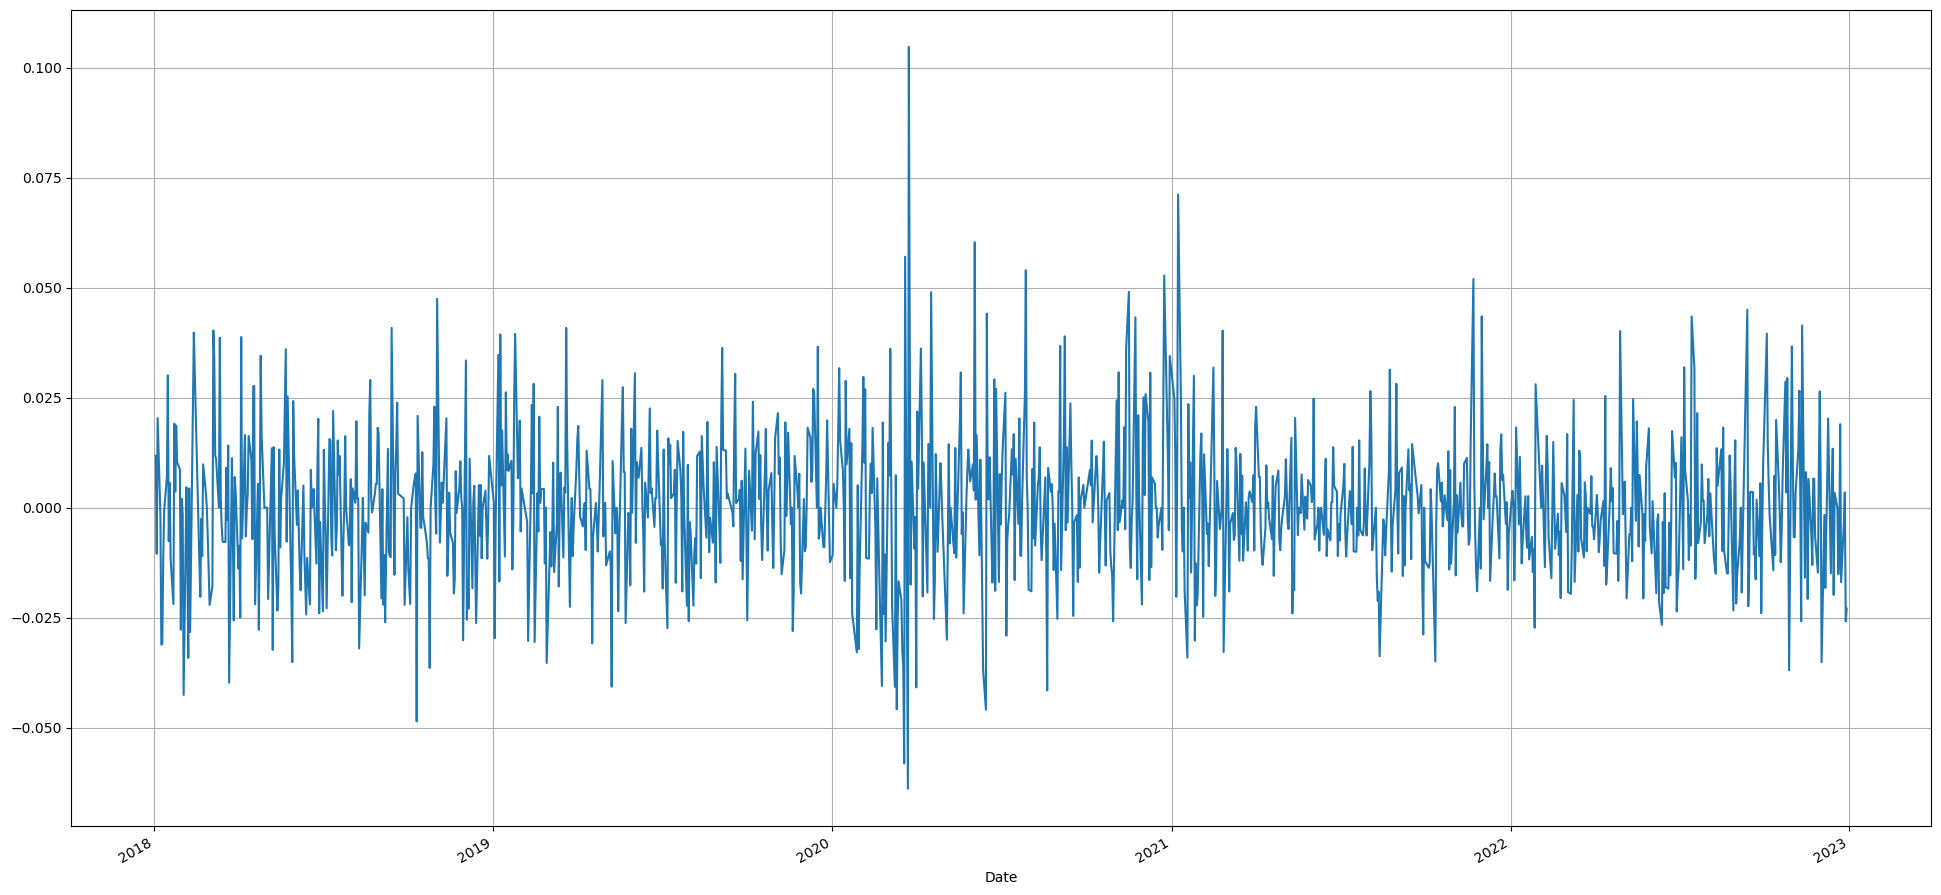

In [3]:
# 수익률 확인 -> pct_change를 plot해주면 된다
price.Samsung.pct_change().plot(figsize=(24,12))

# 격자(그리드)출력
plt.grid();

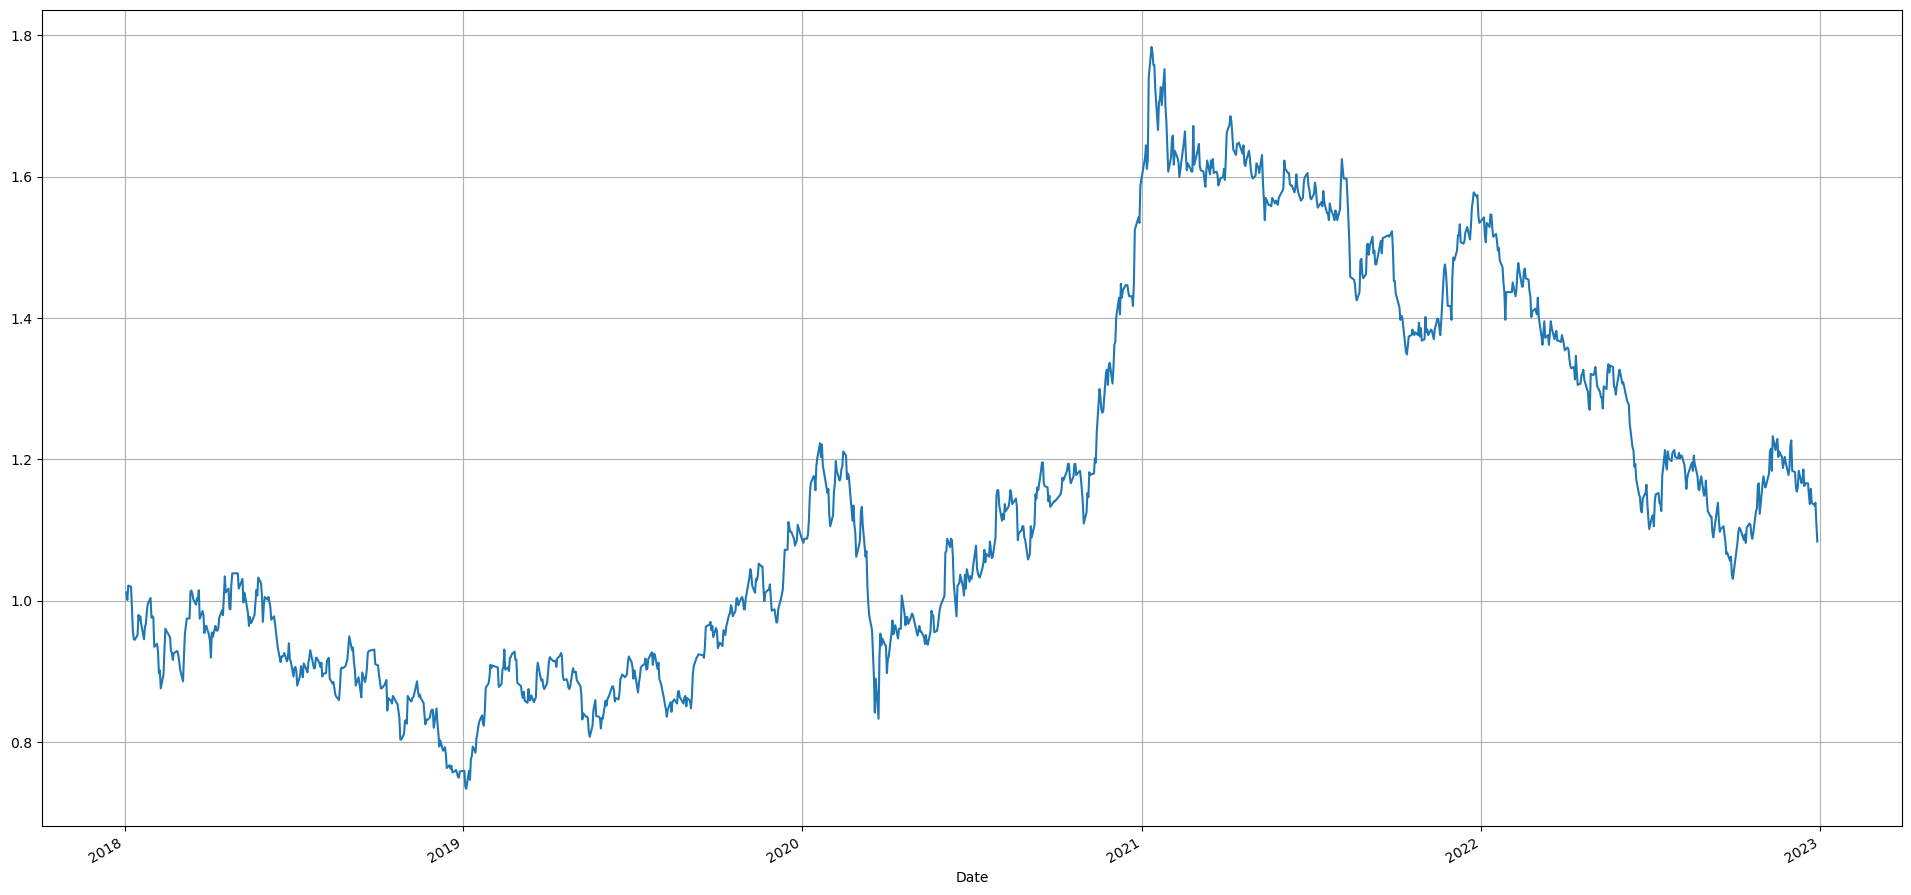

In [7]:
# 지난시간 복습) 
# Buy and Hold 전략 리턴을 찍어보자
(price.Samsung.pct_change() + 1).cumprod() \
                        .plot(figsize=(24,12))
plt.grid();

In [15]:
# shift 함수 : 데이터프레임을 그대로 민다(shift)고 생각하면 됨 -> Forward Looking Bias(=Look Ahead Bias를 방지한다)
# 사용예시) 전략을 구현해서, Buy 시그널 발생시 다음날 매수 -> shift쓰면 됨
price.shift(1)

,HMM,Samsung,S-Oil,Ecopro,NCsoft,Hyundai
Date,,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,5010.0,51020.0,117000.0,25698.0,446500.0,149500.0
2018-01-04,4790.0,51620.0,113500.0,24630.0,435000.0,150500.0
2018-01-05,4625.0,51080.0,113500.0,23918.0,422500.0,146500.0
2018-01-08,4635.0,52120.0,113000.0,24727.0,422000.0,149000.0
...,...,...,...,...,...,...
2022-12-23,22450.0,59100.0,88200.0,114131.0,438500.0,158500.0
2022-12-26,21700.0,58100.0,88000.0,108595.0,429500.0,157000.0
2022-12-27,21750.0,57900.0,89500.0,110926.0,432000.0,158000.0


In [17]:
rtn = price.pct_change().dropna()
rtn

,HMM,Samsung,S-Oil,Ecopro,NCsoft,Hyundai
Date,,,,,,
2018-01-03,-0.043912,0.011760,-0.029915,-0.041560,-0.025756,0.006689
2018-01-04,-0.034447,-0.010461,0.000000,-0.028908,-0.028736,-0.026578
2018-01-05,0.002162,0.020360,-0.004405,0.033824,-0.001183,0.017065
2018-01-08,-0.024811,-0.001919,-0.013274,-0.023577,-0.004739,0.013423
2018-01-09,-0.021018,-0.031142,0.022422,-0.006668,0.008333,0.009934
...,...,...,...,...,...,...
2022-12-23,-0.033408,-0.016920,-0.002268,-0.048506,-0.020525,-0.009464
2022-12-26,0.002304,-0.003442,0.017045,0.021465,0.005821,0.006369
2022-12-27,0.004598,0.003454,-0.004469,0.007879,0.000000,0.000000


    간단한 전략을 구현해보겠습니다

In [18]:
# 간단한 Cross-Sectional Momentum 전략을 구현해보자
# rank가 높으면 많은 비중을 담는 전략을 구현하겠습니다(+Daily Rebalancing)

# rank를 계산해줍니다
rank = rtn.rank(axis=1)
rank

,HMM,Samsung,S-Oil,Ecopro,NCsoft,Hyundai
Date,,,,,,
2018-01-03,1.0,6.0,3.0,2.0,4.0,5.0
2018-01-04,1.0,5.0,6.0,2.0,3.0,4.0
2018-01-05,3.0,5.0,1.0,6.0,2.0,4.0
2018-01-08,1.0,5.0,3.0,2.0,4.0,6.0
2018-01-09,2.0,1.0,6.0,3.0,4.0,5.0
...,...,...,...,...,...,...
2022-12-23,2.0,4.0,6.0,1.0,3.0,5.0
2022-12-26,2.0,1.0,5.0,6.0,3.0,4.0
2022-12-27,5.0,4.0,1.0,6.0,2.5,2.5


In [19]:
# rank별로 주식의 weight를 계산해줍니다
weight = rank.apply(lambda x: x / x.sum(), axis=1)

weight

,HMM,Samsung,S-Oil,Ecopro,NCsoft,Hyundai
Date,,,,,,
2018-01-03,0.047619,0.285714,0.142857,0.095238,0.190476,0.238095
2018-01-04,0.047619,0.238095,0.285714,0.095238,0.142857,0.190476
2018-01-05,0.142857,0.238095,0.047619,0.285714,0.095238,0.190476
2018-01-08,0.047619,0.238095,0.142857,0.095238,0.190476,0.285714
2018-01-09,0.095238,0.047619,0.285714,0.142857,0.190476,0.238095
...,...,...,...,...,...,...
2022-12-23,0.095238,0.190476,0.285714,0.047619,0.142857,0.238095
2022-12-26,0.095238,0.047619,0.238095,0.285714,0.142857,0.190476
2022-12-27,0.238095,0.190476,0.047619,0.285714,0.119048,0.119048


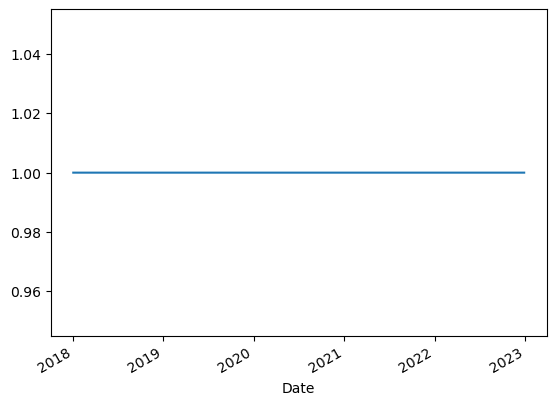

In [20]:
# weight가 잘 계산 되었는지는 sum해보면 됩니다 (Leverage는 고려하지 않겠습니다)
weight.sum(axis=1).plot(); 

# 전부 합이 1 -> 완벽하네요

In [21]:
# 포트폴리오의 가중치와 수익률을 곱해줍니다
## weight를 shift해주는 걸 잊지 맙시다!!! 우리는 Market이 열려있는 동안 rank를 계산할 수는 없습니다!!
### 곱해준걸 sum해주면 포트폴리오의 수익률입니다
pf_rtn = (weight.shift(1) * rtn).sum(axis=1)
pf_rtn

Date
2018-01-03    0.000000
2018-01-04   -0.019184
2018-01-05    0.009995
2018-01-08   -0.009264
2018-01-09   -0.001422
                ...   
2022-12-23   -0.020834
2022-12-26    0.007804
2022-12-27    0.001789
2022-12-28   -0.043929
2022-12-29   -0.007905
Length: 1231, dtype: float64

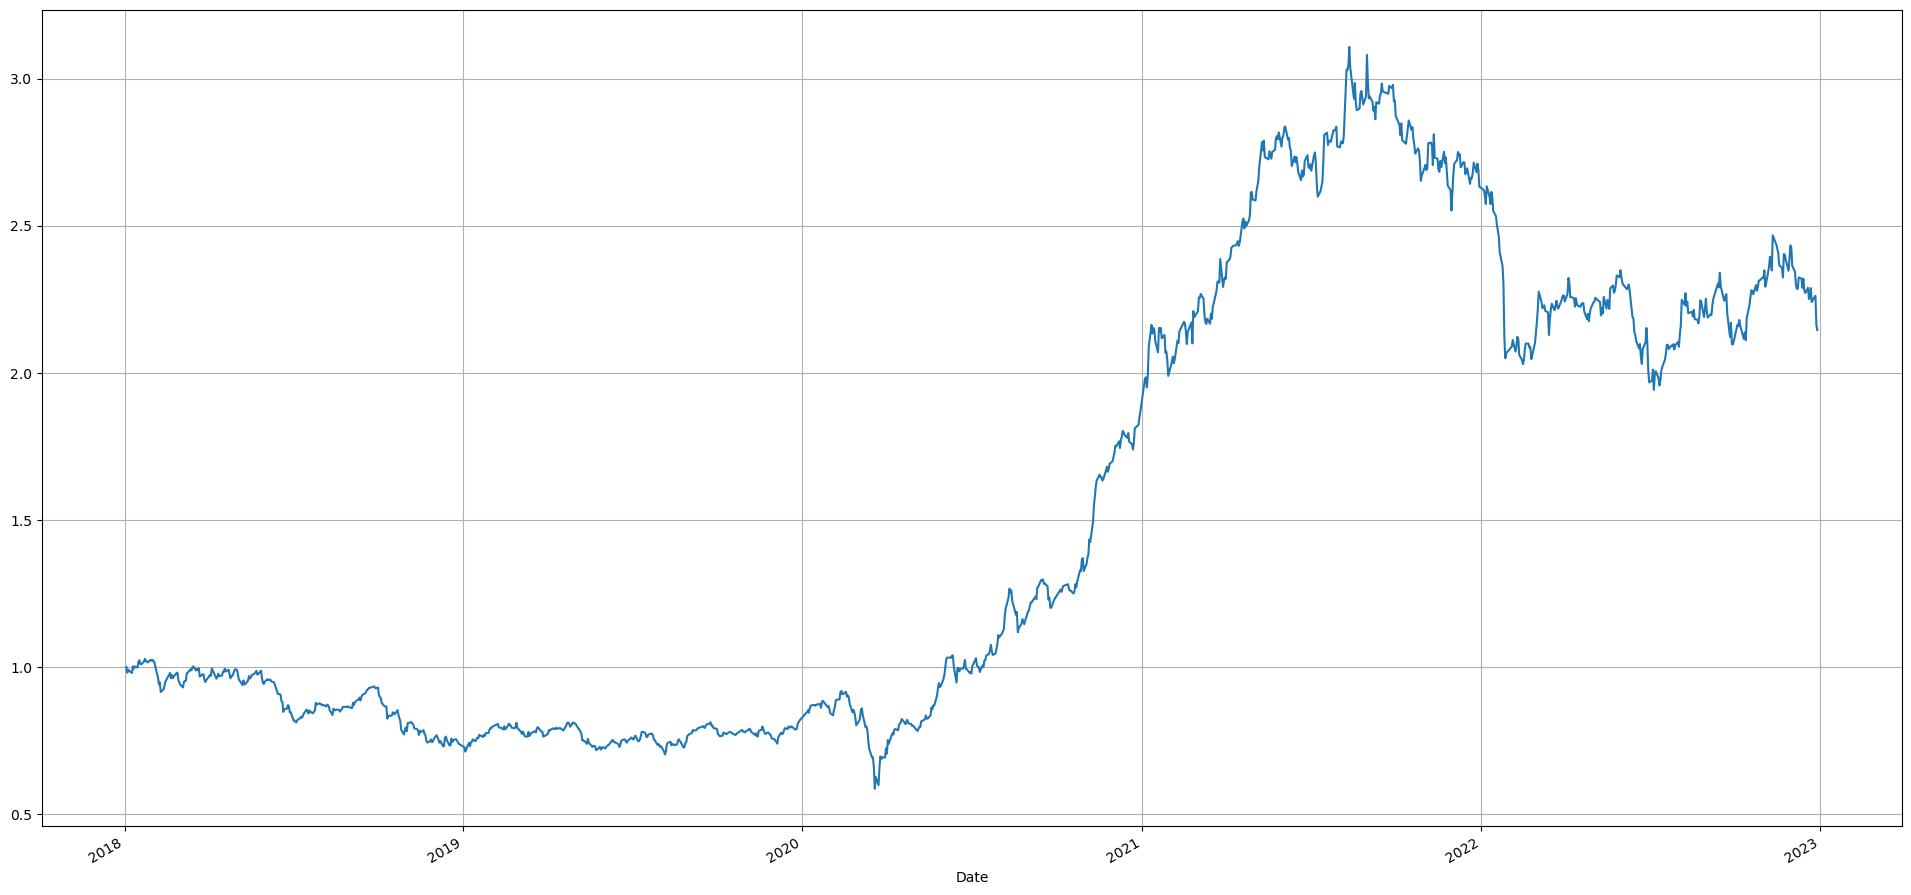

In [22]:
# 이제 1을 더해서 cumprod 해주면 되겠죠?
(pf_rtn + 1).cumprod().plot(figsize=(24,12))
plt.grid();